In [1]:
import pandas as pd
import talib
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from datetime import datetime
import time

In [2]:
import datafunc; reload(datafunc)
from datafunc import *

In [3]:
df = pd.read_csv('all_dailies.csv')

In [4]:
df['rank'] = get_ranks(df)

In [5]:
df['return'] = df['close'].groupby(df['ticker']).pct_change()
df['cumret'] = df.groupby('ticker')['return'].transform(lambda x: (1 + x).cumprod())

In [6]:
top = df[df['rank'] <= 5000].copy()
recent = top[top['date'] >= '2023-01-01'].copy()

In [24]:
recent['cumret'] = recent.groupby('ticker')['return'].transform(lambda x: (1 + x).cumprod())

In [7]:
recent['crosses'] = recent.groupby('ticker').close.transform(get_crossings)
recent['crosses5'] = recent.groupby('ticker').close.transform(lambda x: get_crossings(x, ma=5))
recent['crosses15'] = recent.groupby('ticker').close.transform(lambda x: get_crossings(x, ma=15))
recent['crosses30'] = recent.groupby('ticker').close.transform(lambda x: get_crossings(x, ma=30))

In [25]:
between = get_between(recent)

In [26]:
between['std'] = between.groupby('ticker')['return'].transform(lambda x: x.std())
between['stddev'] = between['std'].transform(normalize)
between['crossnorm'] = between['crosses'].transform(normalize)


In [42]:
between['score'] = np.sqrt(0.1*between['stddev']**2 + between['crossnorm']**2)

In [43]:
between.groupby('ticker')['score'].mean().nlargest(10)

ticker
VERB     9.508580
MNTS     9.380462
BOIL     5.420929
SPRC     4.695778
KNG      3.632566
HLN      3.632112
DGICA    3.526119
ELS      3.526094
CLOV     3.422177
BNDX     3.314917
Name: score, dtype: float64

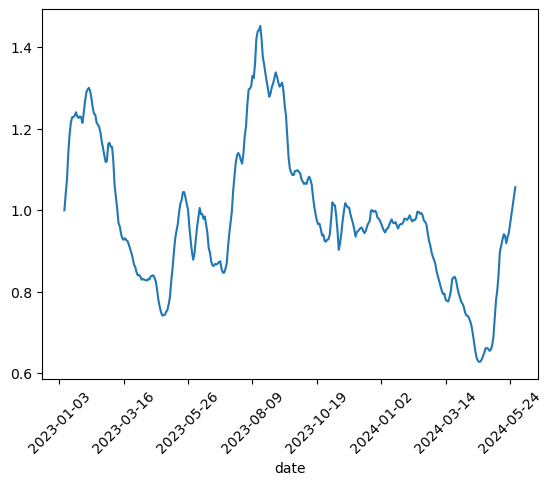

In [47]:
plot(between, 'clov', 5)

In [23]:
between[between.ticker=='VCNX']

,ticker,volume,open,close,high,low,window_start,transactions,date,value,...,return,cumret,crosses,crosses5,crosses30,crosses15,std,stddev,crossnorm,score
9223897,VCNX,36867,0.620,0.6321,0.662000,0.5900,1672722000000000000,73,2023-01-03,2.330363e+04,...,-0.019240,0.084280,1,5,30,15,0.764706,8.90522,-1.755414,9.076587
9234835,VCNX,22183,0.610,0.6421,0.650000,0.6100,1672808400000000000,145,2023-01-04,1.424370e+04,...,0.015820,0.085613,1,5,30,15,0.764706,8.90522,-1.755414,9.076587
9245783,VCNX,16539,0.640,0.6100,0.649900,0.6039,1672894800000000000,43,2023-01-05,1.008879e+04,...,-0.049992,0.081333,1,5,30,15,0.764706,8.90522,-1.755414,9.076587
9256840,VCNX,16399,0.630,0.6400,0.649999,0.6111,1672981200000000000,58,2023-01-06,1.049536e+04,...,0.049180,0.085333,1,5,30,15,0.764706,8.90522,-1.755414,9.076587
9267793,VCNX,42320,0.610,0.6496,0.675000,0.6100,1673240400000000000,129,2023-01-09,2.749107e+04,...,0.015000,0.086613,1,5,30,15,0.764706,8.90522,-1.755414,9.076587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12935800,VCNX,1052,5.240,5.4000,5.400000,5.2400,1716523200000000000,97,2024-05-24,5.680800e+03,...,0.048544,0.720000,1,5,30,15,0.764706,8.90522,-1.755414,9.076587
12946318,VCNX,9494,5.300,5.0100,5.300000,4.8000,1716868800000000000,157,2024-05-28,4.756494e+04,...,-0.072222,0.668000,1,5,30,15,0.764706,8.90522,-1.755414,9.076587
12956824,VCNX,5304,4.835,5.0000,5.346900,4.8350,1716955200000000000,114,2024-05-29,2.652000e+04,...,-0.001996,0.666667,1,5,30,15,0.764706,8.90522,-1.755414,9.076587
12967300,VCNX,2171,5.120,5.2000,5.220000,5.1200,1717041600000000000,76,2024-05-30,1.128920e+04,...,0.040000,0.693333,1,5,30,15,0.764706,8.90522,-1.755414,9.076587


In [97]:
between.groupby('ticker')['crosses'].mean().nlargest(10)

ticker
HLN      53.0
KNG      53.0
DGICA    52.0
BNDX     50.0
NSpC     50.0
SREA     50.0
CHSCL    48.0
JPMpC    48.0
WHF      48.0
RZC      47.0
Name: crosses, dtype: float64

In [132]:
between.groupby('ticker')['crosses15'].mean().nlargest(20)

ticker
BIL      41.0
GBIL     39.0
TBIL     39.0
BILS     33.0
CLIP     33.0
SHV      33.0
XHLF     33.0
SGOV     31.0
XBIL     31.0
MSpE     29.0
CHSCL    28.0
IGD      28.0
CHSCM    27.0
HLN      27.0
SLCA     27.0
AB       26.0
BNDX     26.0
GNR      26.0
HON      26.0
PFXF     26.0
Name: crosses15, dtype: float64

In [ ]:
# RZC, HLN, KNG, DGICA, BNDX, CHSCL, CHSCM, HON, GNR, AB, SLCA

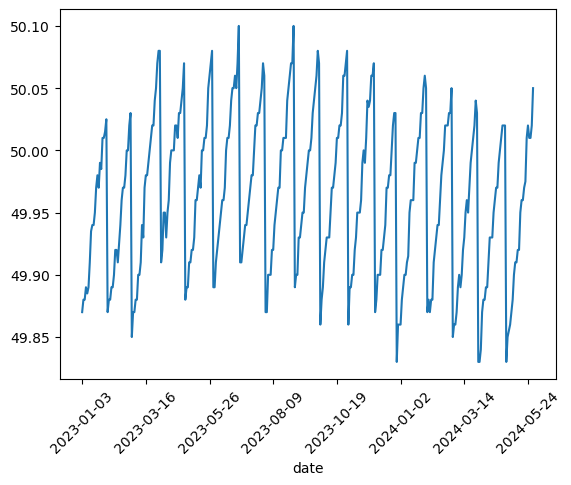

In [144]:
plot(between, 'tbil', ma=1)

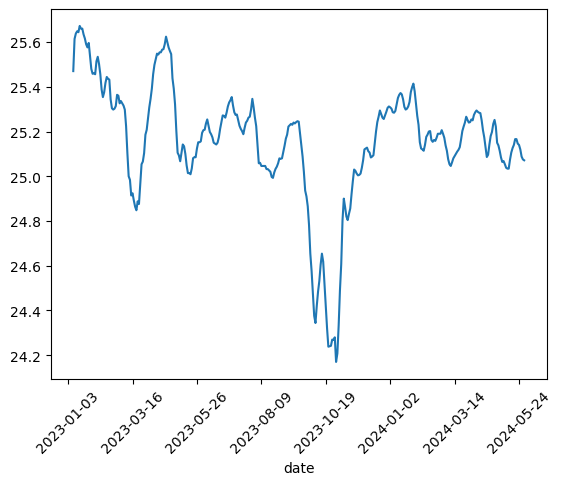

In [113]:
plot(between, forceticker='JPMpC', ma=5)

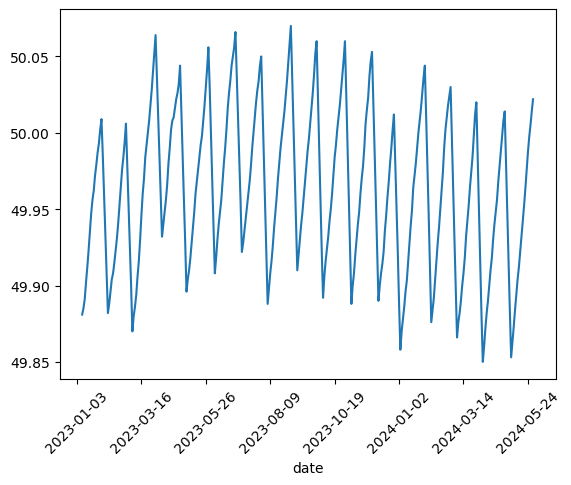

In [102]:
plot(between, 'tbil', ma=5)